In [4]:
import math
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy.integrate import solve_ivp

Enter the initial prey population:  500
Enter the initial middle predator population:  20
Enter the initial apex predator population:  5


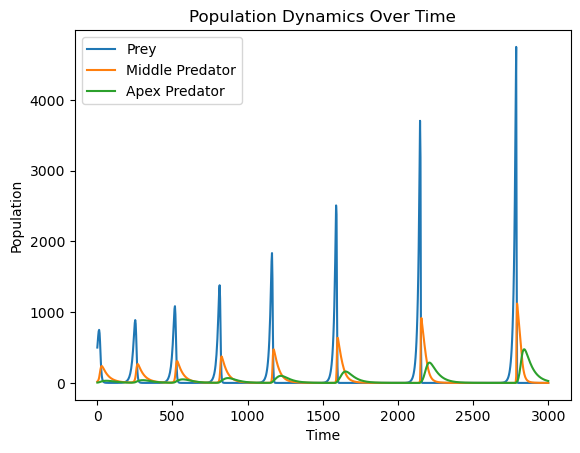

In [24]:
# Model 4a (Chain 1): 1 prey, 1 middle predator (who can eat only prey), and 1 apex predator (who can eat both prey and middle predator)
# without carrying capacity

# x = population density of prey
# y = population density of middle predator
# z = population density of apex predator

# Initializing parameters
a = 0.08 # prey growth rate

b1 = 0.001 # middle predator kill rate of prey
b21 = 0.001 # apex predator kill rate of prey
b22 = 0.0001 # apex predator kill rate of middle predator

c1 = 0.02 # middle predator death rate
c2 = 0.02 # apex predator death rate

d1 = 0.0002 # middle predator growth rate from eating prey
d21 = 0.0001 # apex predator growth rate from eating prey
d22 = 0.00015 # apex predator growth rate from eating middle predator

# Defining Lotka-Volterra differential equations
def dSdt(S, t):
    x, y, z = S
    return [a*x - b1*x*y - b21*x*z,
            -c1*y + d1*x*y - b22*y*z,
            -c2*z + d21*x*z + d22*y*z
           ]

# Initializing population densities
x0 = float(input("Enter the initial prey population: ")) # for example: 500
y0 = float(input("Enter the initial middle predator population: ")) # for example: 20
z0 = float(input("Enter the initial apex predator population: ")) # for example: 5
S0 = (x0, y0, z0)

t = np.linspace(0, 3000, 1000) # time array

sol1 = odeint(dSdt, S0, t) # solving differential equations

sol1_x = sol1[:, 0] # prey population over time
sol1_y = sol1[:, 1] # middle predator population over time
sol1_z = sol1[:, 2] # apex predator population over time

# Plotting populations over time
plt.plot(t, sol1_x, label = "Prey")
plt.plot(t, sol1_y, label = "Middle Predator")
plt.plot(t, sol1_z, label = "Apex Predator")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time")
plt.show()

Enter the initial prey population:  500
Enter the initial middle predator population:  20
Enter the initial apex predator population:  5


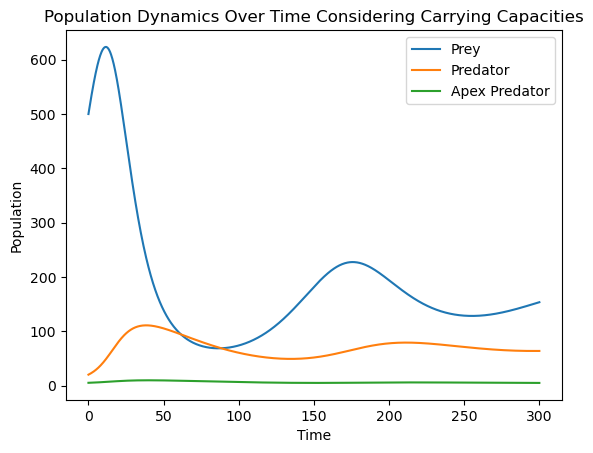

In [26]:
# Model 4b (Chain 1): 1 prey, 1 middle predator (who can eat only prey), and 1 apex predator (who can eat both prey and middle predator)
# with carrying capacity

k1 = 2000 # carrying capacity of prey population
k2 = 200 # carrying capacity of middle predator population
k3 = 20 # carrying capacity of apex predator population

def dSdt(S, t):
    x, y, z = S
    return [a*x*(1-x/k1) - b1*x*y -b21*x*z,
            -c1*y + d1*x*y*(1-y/k2) - b22*y*z,
            -c2*z + (d21*x*z + d22*y*z)*(1-z/k3)
           ]

# Initializing population densities
x0 = float(input("Enter the initial prey population: ")) # for example: 500
y0 = float(input("Enter the initial middle predator population: ")) # for example: 20
z0 = float(input("Enter the initial apex predator population: ")) # for example: 5
S0 = (x0, y0, z0)

t = np.linspace(0, 300, 1000) # time array

# Solving differential equations
sol2 = odeint(dSdt, S0, t)

sol2_x = sol2[:, 0] # prey population over time
sol2_y = sol2[:, 1] # predator population over time
sol2_z = sol2[:, 2] # predator population over time

# Plotting populations over time
plt.plot(t, sol2_x, label = "Prey")
plt.plot(t, sol2_y, label = "Predator")
plt.plot(t, sol2_z, label = "Apex Predator")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time Considering Carrying Capacities")
plt.show()